In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import os
import scikitplot as skplt


ModuleNotFoundError: No module named 'scikitplot'

In [2]:
data=pd.read_csv('final_data.csv')

In [3]:
data.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,COMPLETED,OFNS_DESC,...,JURISDICTION_CODE,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,2019,12,31,Tuesday,17,40.80,-73.94,COMPLETED,PERSONAL,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E
1,968873685,2019,12,29,Sunday,16,40.88,-73.90,COMPLETED,PROPERTY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,E
2,509837549,2019,12,15,Sunday,18,40.75,-73.80,COMPLETED,SEXUAL,...,0.0,0,0,0,25-44,UNKNOWN,M,25-44,WHITE HISPANIC,F
3,352454313,2019,12,28,Saturday,1,40.88,-73.90,COMPLETED,OTHER,...,0.0,0,0,0,18-24,BLACK,M,UNKNOWN,UNKNOWN,E
4,293718737,2019,12,27,Friday,22,40.72,-74.00,ATTEMPTED,PROPERTY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,M


In [5]:
data.columns

Index(['CMPLNT_NUM', 'year', 'month', 'day', 'weekday', 'hour', 'Latitude',
       'Longitude', 'COMPLETED', 'OFNS_DESC', 'ADDR_PCT_CD', 'CRIME_CLASS',
       'BORO_NM', 'PREM_TYP_DESC', 'OCCURENCE', 'JURIS_DESC',
       'JURISDICTION_CODE', 'IN_PARK', 'IN_PUBLIC_HOUSING', 'IN_STATION',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'VIC_AGE_GROUP', 'VIC_RACE',
       'VIC_SEX'],
      dtype='object')

In [7]:
#example from the dataset
print(data.iloc[0])

CMPLNT_NUM                  394506329
year                             2019
month                              12
day                                31
weekday                       Tuesday
hour                               17
Latitude                         40.8
Longitude                      -73.94
COMPLETED                   COMPLETED
OFNS_DESC                    PERSONAL
ADDR_PCT_CD                      32.0
CRIME_CLASS                    FELONY
BORO_NM                     MANHATTAN
PREM_TYP_DESC                  STREET
OCCURENCE                     UNKNOWN
JURIS_DESC           N.Y. POLICE DEPT
JURISDICTION_CODE                 0.0
IN_PARK                             0
IN_PUBLIC_HOUSING                   0
IN_STATION                          0
SUSP_AGE_GROUP                UNKNOWN
SUSP_RACE                     UNKNOWN
SUSP_SEX                            U
VIC_AGE_GROUP                 UNKNOWN
VIC_RACE                      UNKNOWN
VIC_SEX                             E
Name: 0, dty

# Create a balanced Dataset

In [18]:
misdemeanor_data = data[data['CRIME_CLASS'] == 'MISDEMEANOR']
felony_data = data[data['CRIME_CLASS'] == 'FELONY']
violation_data = data[data['CRIME_CLASS'] == 'VIOLATION']

# Determine the minimum number of rows among the classes
min_class_size = min(len(misdemeanor_data), len(felony_data), len(violation_data))

# Sample an equal number of rows from each class
balanced_data = pd.concat([
    misdemeanor_data.sample(min_class_size, random_state=42),
    felony_data.sample(min_class_size, random_state=42),
    violation_data.sample(min_class_size, random_state=42)
], axis=0)

# Shuffle the resulting DataFrame
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [19]:
balanced_data.head()

,CMPLNT_NUM,year,month,day,weekday,hour,Latitude,Longitude,COMPLETED,OFNS_DESC,...,JURISDICTION_CODE,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,192373457,2018,4,6,Friday,5,40.66,-74.00,COMPLETED,PROPERTY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,UNKNOWN,UNKNOWN,D
1,694818654,2014,6,12,Thursday,6,40.78,-73.94,COMPLETED,SEXUAL,...,0.0,0,0,0,UNKNOWN,BLACK,M,25-44,BLACK HISPANIC,M
2,252672750,2007,12,17,Monday,19,40.70,-73.80,COMPLETED,SEXUAL,...,0.0,0,0,0,UNKNOWN,ASIAN / PACIFIC ISLANDER,F,45-64,WHITE HISPANIC,F
3,623894067,2017,12,26,Tuesday,9,40.62,-74.10,COMPLETED,PROPERTY,...,0.0,0,0,0,25-44,BLACK,F,45-64,WHITE,M
4,525294974,2016,11,16,Wednesday,21,40.78,-73.80,COMPLETED,PROPERTY,...,0.0,0,0,0,UNKNOWN,UNKNOWN,U,18-24,ASIAN / PACIFIC ISLANDER,F


# DATA PREPARATION
Choosing the columns that we will use in our Model

In [30]:
# Set the list of features to include in Machine Learning Model
feature_lst=['year', 'month', 'day', 'hour', 'Latitude',
       'Longitude', 'COMPLETED', 'CRIME_CLASS', 'ADDR_PCT_CD',
       'BORO_NM','IN_PARK', 'IN_PUBLIC_HOUSING',
       'IN_STATION', 'VIC_AGE_GROUP', 'VIC_RACE','VIC_SEX']

df_sel=balanced_data[feature_lst].copy()
df_sel.info()
df_sel.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088836 entries, 0 to 3088835
Data columns (total 16 columns):
 #   Column             Dtype  
---  ------             -----  
 0   year               int64  
 1   month              int64  
 2   day                int64  
 3   hour               int64  
 4   Latitude           float64
 5   Longitude          float64
 6   COMPLETED          object 
 7   CRIME_CLASS        object 
 8   ADDR_PCT_CD        float64
 9   BORO_NM            object 
 10  IN_PARK            int64  
 11  IN_PUBLIC_HOUSING  int64  
 12  IN_STATION         int64  
 13  VIC_AGE_GROUP      object 
 14  VIC_RACE           object 
 15  VIC_SEX            object 
dtypes: float64(3), int64(7), object(6)
memory usage: 377.1+ MB


,year,month,day,hour,Latitude,Longitude,COMPLETED,CRIME_CLASS,ADDR_PCT_CD,BORO_NM,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2018,4,6,5,40.66,-74.00,COMPLETED,MISDEMEANOR,78.0,BROOKLYN,0,0,0,UNKNOWN,UNKNOWN,D
1,2014,6,12,6,40.78,-73.94,COMPLETED,VIOLATION,19.0,MANHATTAN,0,0,0,25-44,BLACK HISPANIC,M
2,2007,12,17,19,40.70,-73.80,COMPLETED,VIOLATION,102.0,QUEENS,0,0,0,45-64,WHITE HISPANIC,F
3,2017,12,26,9,40.62,-74.10,COMPLETED,FELONY,120.0,STATEN ISLAND,0,0,0,45-64,WHITE,M
4,2016,11,16,21,40.78,-73.80,COMPLETED,MISDEMEANOR,109.0,QUEENS,0,0,0,18-24,ASIAN / PACIFIC ISLANDER,F


In [32]:
class_mapping = {'MISDEMEANOR': 0, 'VIOLATION': 1, 'FELONY': 2}
completed_mapping={'COMPLETED':1,'ATTEMPTED':0}
# Apply the mapping to the 'CRIME_CLASS' column and COMPLETED column
df_sel['CRIME_CLASS'] = df_sel['CRIME_CLASS'].map(class_mapping)
df_sel['COMPLETED'] = df_sel['COMPLETED'].map(completed_mapping)



In [33]:
df_sel.head()

,year,month,day,hour,Latitude,Longitude,COMPLETED,CRIME_CLASS,ADDR_PCT_CD,BORO_NM,IN_PARK,IN_PUBLIC_HOUSING,IN_STATION,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,2018,4,6,5,40.66,-74.00,1,0,78.0,BROOKLYN,0,0,0,UNKNOWN,UNKNOWN,D
1,2014,6,12,6,40.78,-73.94,1,1,19.0,MANHATTAN,0,0,0,25-44,BLACK HISPANIC,M
2,2007,12,17,19,40.70,-73.80,1,1,102.0,QUEENS,0,0,0,45-64,WHITE HISPANIC,F
3,2017,12,26,9,40.62,-74.10,1,2,120.0,STATEN ISLAND,0,0,0,45-64,WHITE,M
4,2016,11,16,21,40.78,-73.80,1,0,109.0,QUEENS,0,0,0,18-24,ASIAN / PACIFIC ISLANDER,F


In [34]:
print(df_sel.shape)
df_sel.CRIME_CLASS.value_counts().sort_values(ascending=False)


(3088836, 16)


CRIME_CLASS
0    1029612
1    1029612
2    1029612
Name: count, dtype: int64

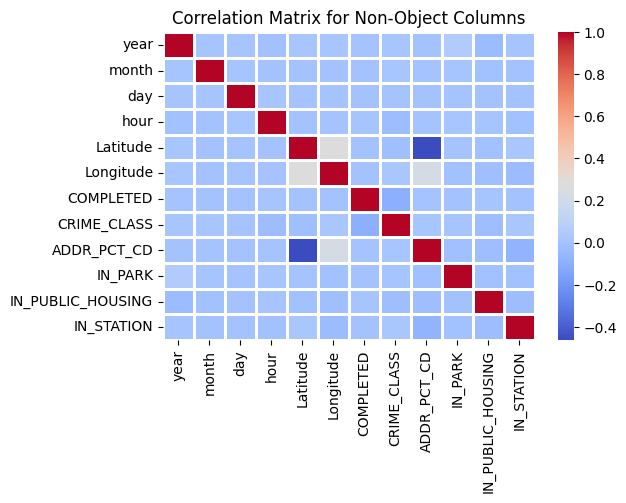

In [38]:
non_object_columns = df_sel.select_dtypes(exclude='object')

# Calculate correlation matrix
corr = non_object_columns.corr()

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, cmap="coolwarm", linewidth=2, linecolor="white",annot=False)
plt.title("Correlation Matrix for Non-Object Columns")
plt.show()

**Deal with categorical data**

In [39]:
df = pd.get_dummies(df_sel)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088836 entries, 0 to 3088835
Data columns (total 37 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   year                                     int64  
 1   month                                    int64  
 2   day                                      int64  
 3   hour                                     int64  
 4   Latitude                                 float64
 5   Longitude                                float64
 6   COMPLETED                                int64  
 7   CRIME_CLASS                              int64  
 8   ADDR_PCT_CD                              float64
 9   IN_PARK                                  int64  
 10  IN_PUBLIC_HOUSING                        int64  
 11  IN_STATION                               int64  
 12  BORO_NM_BRONX                            bool   
 13  BORO_NM_BROOKLYN                         bool   
 14  BORO_NM_MANHATTAN 

change the bool columns to uint8 

In [40]:
bool_columns = df.select_dtypes(include='bool').columns

# Convert boolean columns to uint8
df[bool_columns] = df[bool_columns].astype('uint8')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088836 entries, 0 to 3088835
Data columns (total 37 columns):
 #   Column                                   Dtype  
---  ------                                   -----  
 0   year                                     int64  
 1   month                                    int64  
 2   day                                      int64  
 3   hour                                     int64  
 4   Latitude                                 float64
 5   Longitude                                float64
 6   COMPLETED                                int64  
 7   CRIME_CLASS                              int64  
 8   ADDR_PCT_CD                              float64
 9   IN_PARK                                  int64  
 10  IN_PUBLIC_HOUSING                        int64  
 11  IN_STATION                               int64  
 12  BORO_NM_BRONX                            uint8  
 13  BORO_NM_BROOKLYN                         uint8  
 14  BORO_NM_MANHATTAN 

In [45]:
del df_sel
del balanced_data
del data

# USEFUL FUNCTIONS

In [ ]:
def plot_cm(y_pred,y_test,algorithm,figure_name):
    mat_RF = confusion_matrix(y_pred,y_test)
    plt.figure(figsize=(16,4))
    sns.heatmap(mat_RF, square=True, annot=True, fmt='d', cbar=False,xticklabels=[0,1,2],yticklabels=[0,1,2])
    plt.xlabel('True labels')
    plt.ylabel('predicted labels')
    plt.title(algorithm)
    plt.savefig(figure_name)

In [ ]:
def plot_roc(y_test, model, figure_name):
    pl = skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), figsize=(12,6))
    plt.show()
    pl.figure.savefig(figure_name)

In [ ]:
def save_model(model, model_name,is_tree=False):
    joblib.dump(model.estimators_[0] if is_tree else model,f'{model_name}.joblib')
    print(f"Model size: {np.round(os.path.getsize(f'{model_name}.joblib') / 1024 / 1024, 2) } MB")